In [11]:
import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Name of the parking sensors

parking_sensors = ["parkplatz-graupsaege-1",
    "parkplatz-fredenbruecke-1",
    "p-r-spiegelau-1",
    "skiwanderzentrum-zwieslerwaldhaus-2",
    "parkplatz-zwieslerwaldhaus-1",
    "parkplatz-zwieslerwaldhaus-nord-1",
    "parkplatz-nationalparkzentrum-falkenstein-2",
    "scheidt-bachmann-parkplatz-1",
    "parkplatz-nationalparkzentrum-lusen-p2",
    "parkplatz-waldhaeuser-kirche-1",
    "parkplatz-waldhaeuser-ausblick-1",
    "parkplatz-skisportzentrum-finsterau-1"] 
paths_to_parking_data = [f'./outputs/merged_parking_data/{sensors}.csv' for sensors in parking_sensors]

In [13]:
# Colors for the parking sensors
colors = ['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52',
 '#333F44',
 '#3A4B5B']

# Visual Inspection

### Visually inspecting the time intervals and the data points and if there are big gaps in the intervals

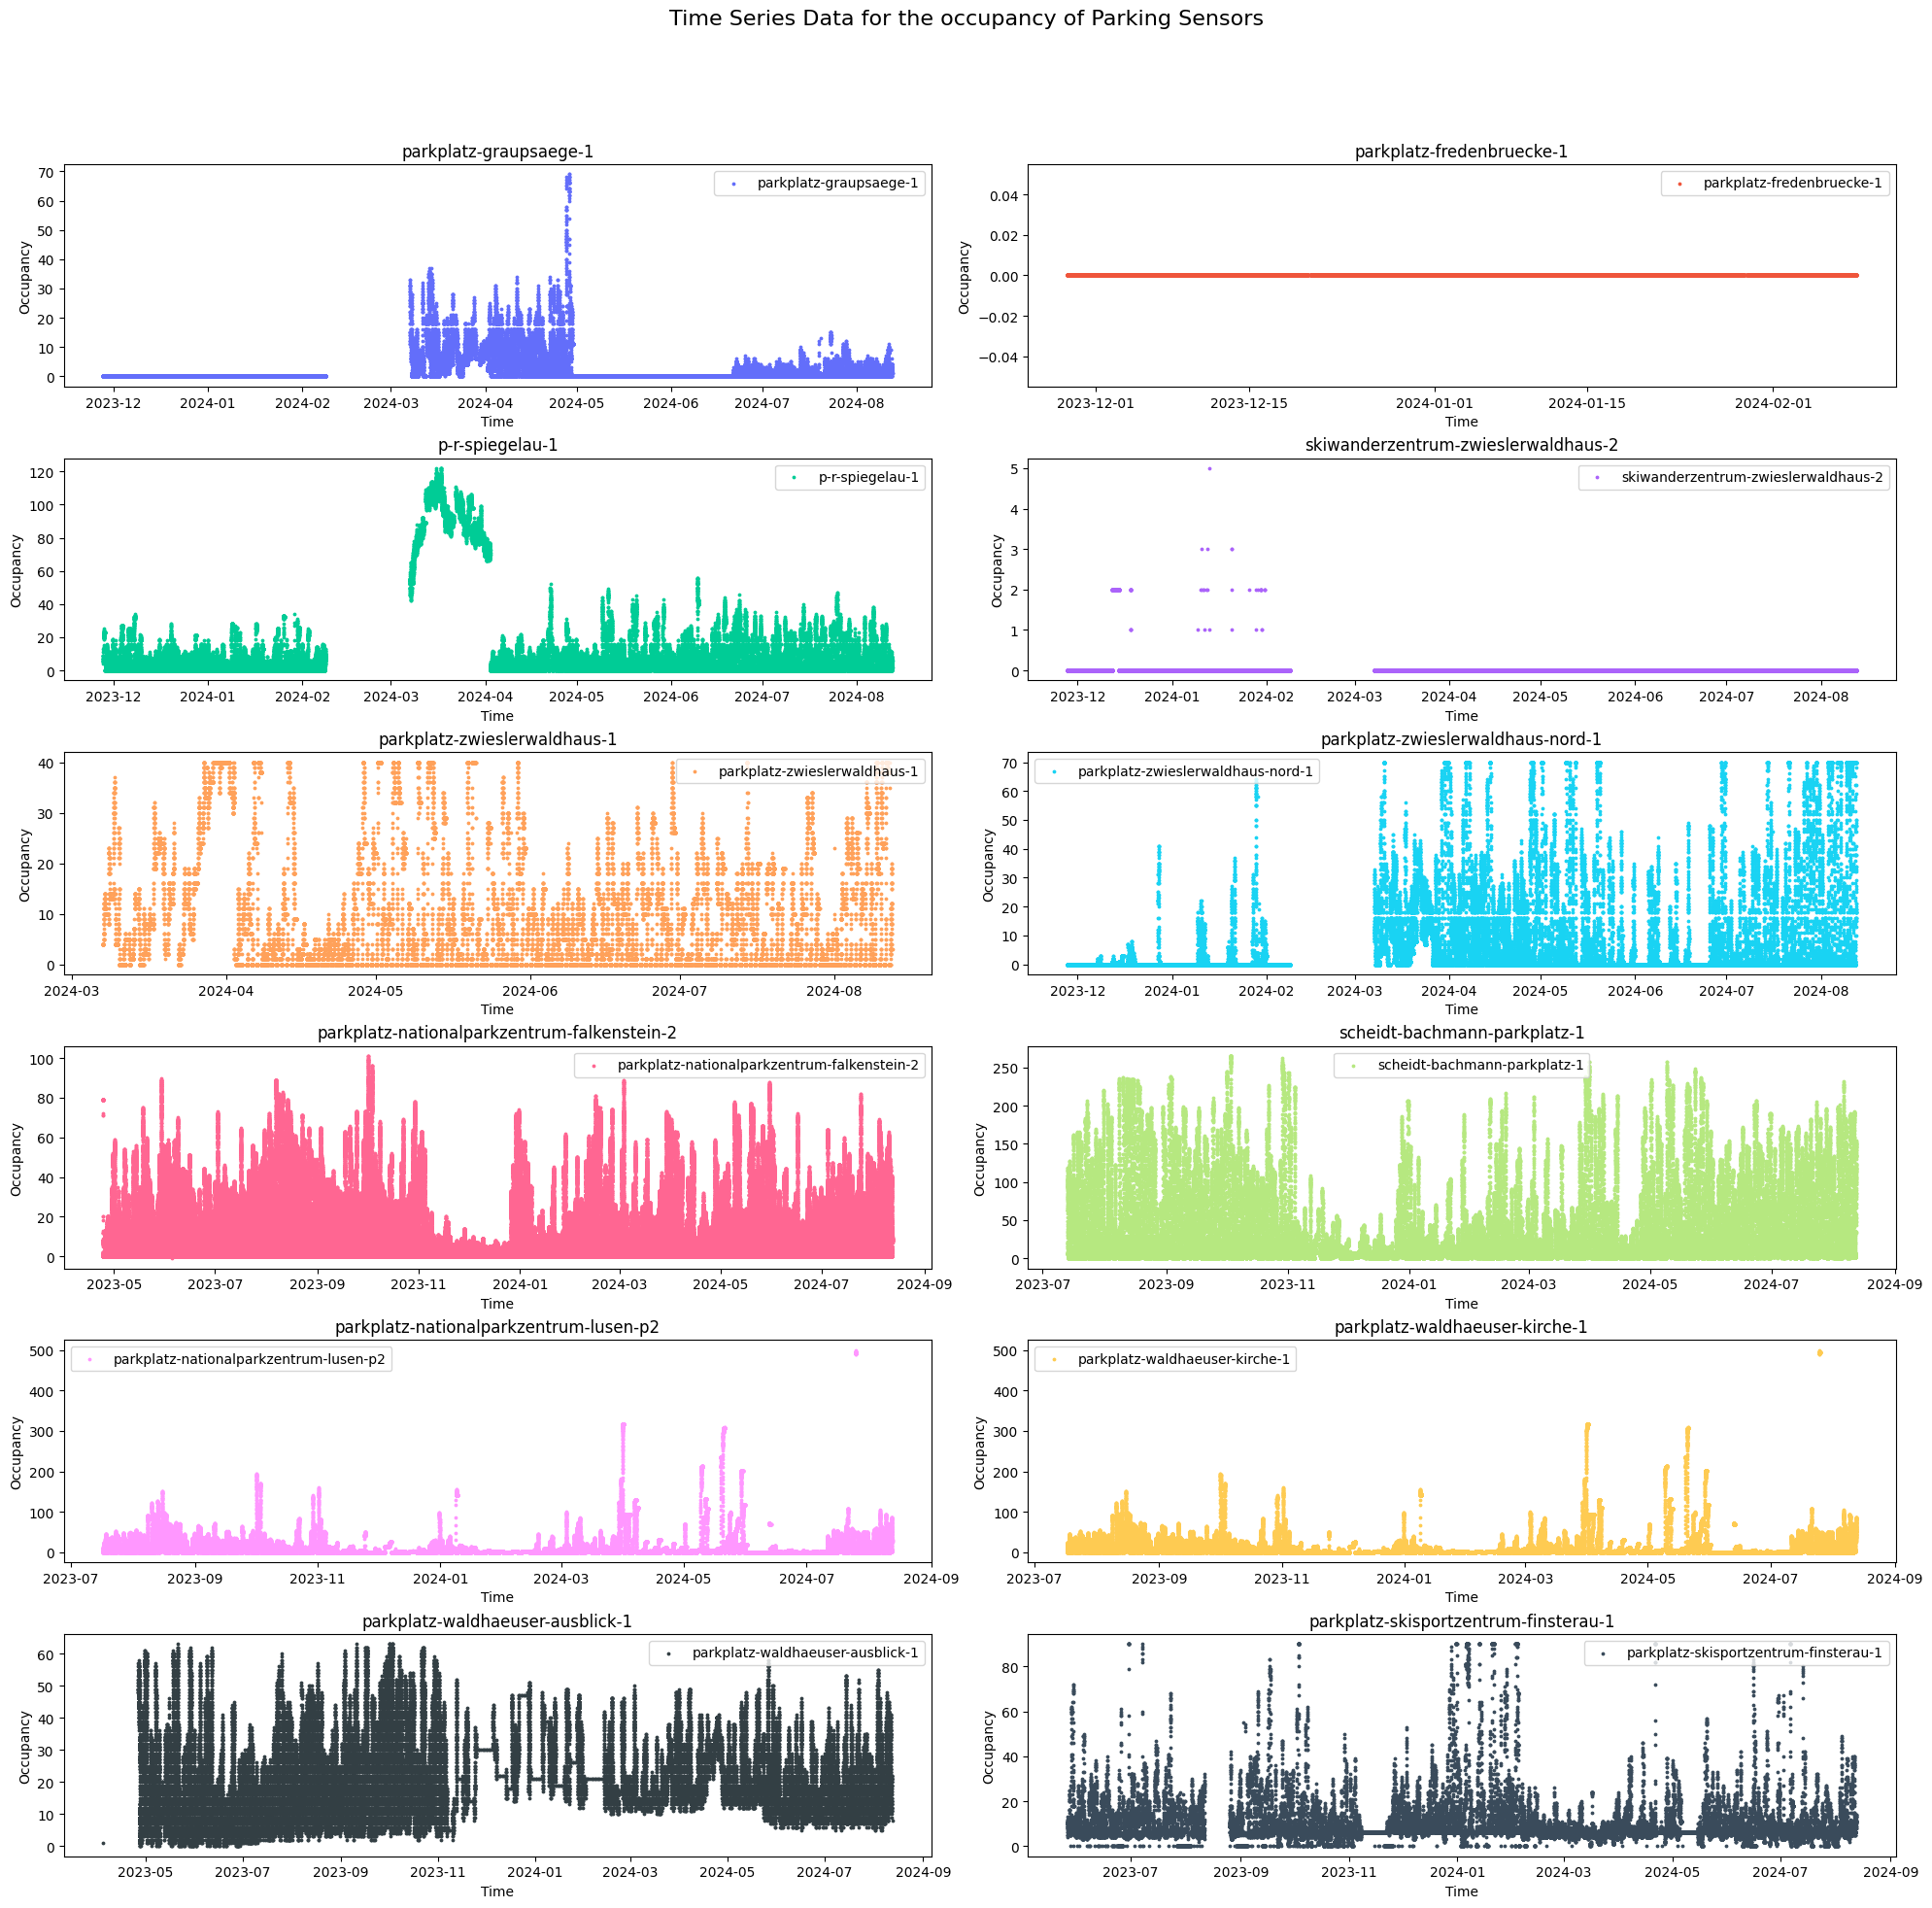

In [14]:
# Number of rows and columns in the subplot grid
rows = 6
cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the CSV files and add a scatter plot for each in its respective subplot
for i, file in enumerate(paths_to_parking_data):
    df = pd.read_csv(file)
    df['time'] = pd.to_datetime(df['time'])  # Convert the time column to datetime
    
    # Plot the data as a scatter plot on the corresponding subplot
    axes[i].scatter(df['time'], df['occupancy'], color=colors[i], label=f"{parking_sensors[i]}", s = 3)
    
    # Set titles and labels for each subplot
    axes[i].set_title(f"{parking_sensors[i]}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Occupancy")
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Set the overall title for the entire figure
fig.suptitle("Time Series Data for the occupancy of Parking Sensors", fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust space to make room for the suptitle

# Show the plot
plt.show()

#### Note
- The data from the sensors have different time intervals.
- The time intervals are not consistent and various from minutes to months.
- The start and end dates are different for each sensor.

# Descriptive Statistics

### Collecting the average, median, mode, standard deviation, and the range of the data points

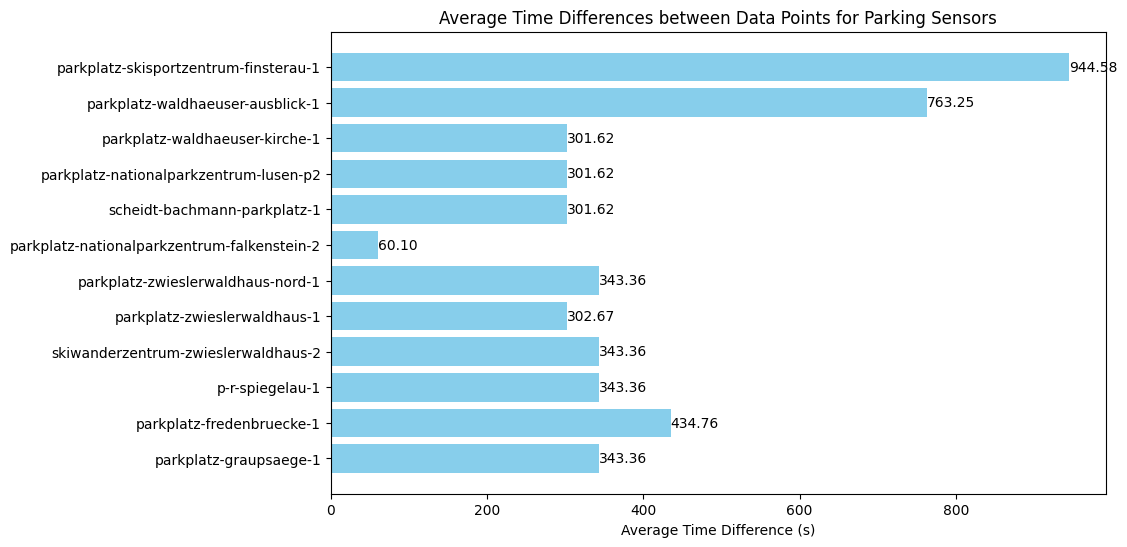

In [10]:
# Collect time differences for each sensor
time_diffs = []
for file in paths_to_parking_data:
    df = pd.read_csv(file)
    df['time'] = pd.to_datetime(df['time'])
    df['time_diff'] = df['time'].diff().dt.total_seconds()
    time_diffs.append(df['time_diff'].dropna())

# Calculate means for demonstration
means = [diffs.mean() for diffs in time_diffs]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(parking_sensors, means, color='skyblue')

# Add value annotations on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # x-coordinate of the text
        bar.get_y() + bar.get_height()/2,  # y-coordinate of the text
        f'{bar.get_width():.2f}',  # text to display
        va='center',  # vertical alignment
        ha='left',  # horizontal alignment
        fontsize=10,  # text size
        color='black'  # text color
    )

# Add labels and title
plt.xlabel("Average Time Difference (s)")
plt.title("Average Time Differences between Data Points for Parking Sensors (in seconds)")
plt.show()

In [17]:
# Statistical summary of the time differences
for i, diffs in enumerate(time_diffs):
    print(f"Sensor: {parking_sensors[i]}")
    print(diffs.describe())
    print("\n")

Sensor: parkplatz-graupsaege-1
count    6.517700e+04
mean     3.433636e+02
std      9.373951e+03
min      8.000000e+00
25%      3.000000e+02
50%      3.000000e+02
75%      3.000000e+02
max      2.392192e+06
Name: time_diff, dtype: float64


Sensor: parkplatz-fredenbruecke-1
count    1.985500e+04
mean     4.347620e+02
std      1.697576e+04
min      8.000000e+00
25%      3.000000e+02
50%      3.000000e+02
75%      3.000000e+02
max      2.392192e+06
Name: time_diff, dtype: float64


Sensor: p-r-spiegelau-1
count    6.517700e+04
mean     3.433636e+02
std      9.373951e+03
min      8.000000e+00
25%      3.000000e+02
50%      3.000000e+02
75%      3.000000e+02
max      2.392192e+06
Name: time_diff, dtype: float64


Sensor: skiwanderzentrum-zwieslerwaldhaus-2
count    6.517700e+04
mean     3.433636e+02
std      9.373951e+03
min      8.000000e+00
25%      3.000000e+02
50%      3.000000e+02
75%      3.000000e+02
max      2.392192e+06
Name: time_diff, dtype: float64


Sensor: parkplatz-zwieslerw

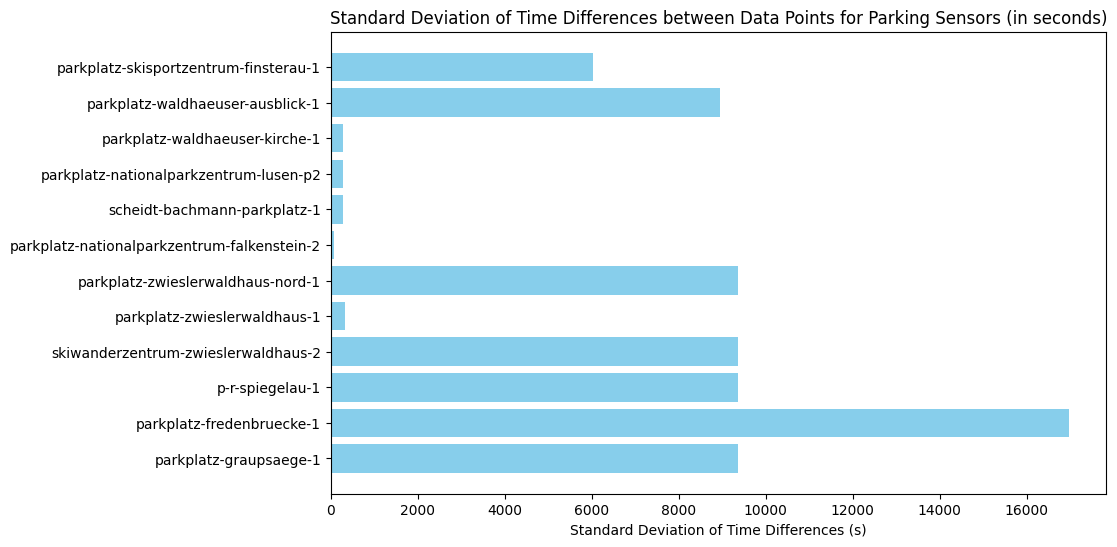

In [20]:
# Plot the standard deviation of the time differences
plt.figure(figsize=(10, 6))
stds = [diffs.std() for diffs in time_diffs]
plt.barh(parking_sensors, stds, color='skyblue')
plt.xlabel("Standard Deviation of Time Differences (s)")
plt.title("Standard Deviation of Time Differences between Data Points for Parking Sensors (in seconds)")
plt.show()

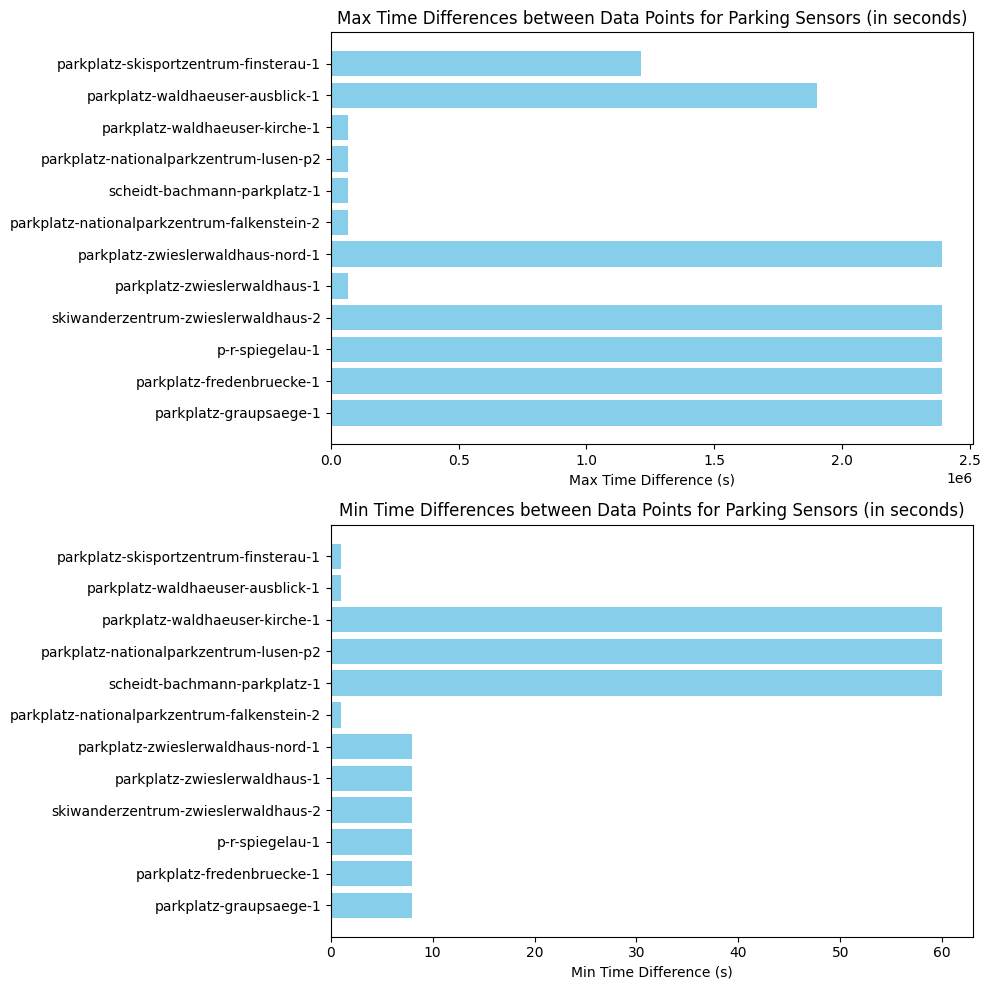

In [23]:
# Plot the max and min time differences

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the max and min time differences
axes[0].barh(parking_sensors, [diffs.max() for diffs in time_diffs], color='skyblue')
axes[0].set_xlabel("Max Time Difference (s)")
axes[0].set_title("Max Time Differences between Data Points for Parking Sensors (in seconds)")

axes[1].barh(parking_sensors, [diffs.min() for diffs in time_diffs], color='skyblue')
axes[1].set_xlabel("Min Time Difference (s)")
axes[1].set_title("Min Time Differences between Data Points for Parking Sensors (in seconds)")

plt.tight_layout()
plt.show()


In [30]:
# Write the max and minimum time differences in a table write in minutes

# Create a DataFrame with the max and min time differences and convert to minutes
time_diff_stats = pd.DataFrame({
    'Sensor': parking_sensors,
    'Max Time Difference (s)': [diffs.max() for diffs in time_diffs],
    'Min Time Difference (s)': [diffs.min() for diffs in time_diffs]
})
time_diff_stats['Max Time Difference (m)'] = time_diff_stats['Max Time Difference (s)'] / 60

time_diff_stats['Min Time Difference (m)'] = time_diff_stats['Min Time Difference (s)'] / 60

# Display the DataFrame
print(time_diff_stats)

                                         Sensor  Max Time Difference (s)  \
0                        parkplatz-graupsaege-1             2.392192e+06   
1                     parkplatz-fredenbruecke-1             2.392192e+06   
2                               p-r-spiegelau-1             2.392192e+06   
3           skiwanderzentrum-zwieslerwaldhaus-2             2.392192e+06   
4                  parkplatz-zwieslerwaldhaus-1             6.840000e+04   
5             parkplatz-zwieslerwaldhaus-nord-1             2.392192e+06   
6   parkplatz-nationalparkzentrum-falkenstein-2             6.810000e+04   
7                  scheidt-bachmann-parkplatz-1             6.840000e+04   
8        parkplatz-nationalparkzentrum-lusen-p2             6.840000e+04   
9                parkplatz-waldhaeuser-kirche-1             6.840000e+04   
10             parkplatz-waldhaeuser-ausblick-1             1.903744e+06   
11        parkplatz-skisportzentrum-finsterau-1             1.212230e+06   

    Min Tim

#### Note

- The mean time interval is around 5 minutes but is not consistent.
- The lowest time interval is 1 minute of 'parkplatz-nationalparkzentrum-falkenstein-2' and the highest interval is 15 minutes of 'parkplatz-nationalparkzentrum-falkenstein-2'.
- Parking spots like the 'parkplatz-fredenbruecke-1' have a very high deviation fo the standard time differences throughout.

# Data Quality Check of all the sensors

#### Check if occupancy rate is (occupancy/capacity)*100

In [19]:
for paths in paths_to_parking_data:
    # Load the data
    df = pd.read_csv(paths)

    # Convert 'time' to datetime if necessary
    df['time'] = pd.to_datetime(df['time'])

    # Calculate the expected occupancy rate
    df['calculated_rate'] = (df['occupancy'] / df['capacity']) * 100

    # Check if the actual occupancy rate is within the error tolerance
    tolerance = 0.1
    df['within_tolerance'] = abs(df['occupancy_rate'] - df['calculated_rate']) <= tolerance

    # if there are any values outside the tolerance
    if not df['within_tolerance'].all():
        print(f"Sensor: {paths}")
        print(df[~df['within_tolerance']])
        print("\n")

Sensor: ./outputs/merged_parking_data/parkplatz-fredenbruecke-1.csv
                           time  occupancy  occupancy_rate  capacity  \
19849 2024-03-07 06:59:53+00:00        NaN               0       NaN   
19850 2024-03-07 07:00:01+00:00        NaN               0       NaN   
19851 2024-03-07 07:01:52+00:00        NaN               0       NaN   
19852 2024-03-07 07:05:01+00:00        NaN               0       NaN   
19853 2024-03-07 07:06:46+00:00        NaN               0       NaN   
19854 2024-03-07 07:10:01+00:00        NaN               0       NaN   
19855 2024-03-07 07:15:01+00:00        NaN               0       NaN   

       calculated_rate  within_tolerance  
19849              NaN             False  
19850              NaN             False  
19851              NaN             False  
19852              NaN             False  
19853              NaN             False  
19854              NaN             False  
19855              NaN             False  


Sensor: .

#### Note 

- The NaN values in the occupancy rate check tells that for the same sensor sometimes the occupancy and capacity are not available for the same time interval.

# Anomaly Detection

#### Calculating the z-score for the occupancy rate and checking for anomalies i.e check the sudden spikes in the occupancy rate

In [44]:
for paths in paths_to_parking_data:
    # # Convert to DataFrame
    df = pd.read_csv(paths)
    df['time'] = pd.to_datetime(df['time'])

    # Calculate the time difference in seconds
    df['time_diff'] = df['time'].diff().dt.total_seconds()

    # Calculate the occupancy difference
    df['occupancy_diff'] = df['occupancy'].diff()

    # Calculate the rate of change (occupancy change per second)
    df['occupancy_rate_of_change'] = df['occupancy_diff'] / df['time_diff']
    # print(df['occupancy_rate_of_change'])

    # # if absolute value of the rate of change is greater than 3 then marked as anomaly
    df['anomaly'] = df['occupancy_rate_of_change'].abs() > 0.03


    # # Calculate the Z-score of the rate of change
    # df['z_score'] = (df['occupancy_rate_of_change'] - df['occupancy_rate_of_change'].mean()) / df['occupancy_rate_of_change'].std()

    # # Flag anomalies (e.g., Z-score > 2 or < -2)
    # df['anomaly'] = df['z_score'].apply(lambda x: 'Anomaly' if abs(x) > 5 else 'Normal')

    sensor_name = paths.split('/')[-1].split('.')[0]    
    print(f"{sensor_name} Anomalies:")

    # Print the anomalies (only the time, occupancy, and anomaly columns) where the anomaly is detected
    print(df[df['anomaly'] == 'Anomaly'][['time', 'occupancy', 'occupancy_rate_of_change','anomaly']])


parkplatz-graupsaege-1 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
parkplatz-fredenbruecke-1 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
p-r-spiegelau-1 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
skiwanderzentrum-zwieslerwaldhaus-2 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
parkplatz-zwieslerwaldhaus-1 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
parkplatz-zwieslerwaldhaus-nord-1 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
parkplatz-nationalparkzentrum-falkenstein-2 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_of_change, anomaly]
Index: []
scheidt-bachmann-parkplatz-1 Anomalies:
Empty DataFrame
Columns: [time, occupancy, occupancy_rate_o